### Analysis of bikes mobility data 

 *Authors: Liubov.*  
 
 Data started to be collected by researchers from CityLab Berlin (*Alexandra*).
 
This is inspired by the workshop https://github.com/technologiestiftung/bike-sharing
    and data shared by Citylab Berlin scientists.
Thanks to Alexandra Kapp and Fabien for inspiration and data, code and ideas sharing.     
    
One can do analysis similar to one which I did with other trajectories for mobility https://github.com/Liyubov/mobility_analysis   
Work in progress. If you find errors, please let me know.

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import csv


# load data, it is very heavy 

df = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/pseudonomysed_raw.csv')
df.head()
df.columns = ["id", "id.1", "id.1.1", "latitude", "longitude", "next_lat", "next_lon", "distance", "duration", "speed", "starttime", "endtime"]


In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import csv
df_cleaned = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/pseudonomysed.csv')

df_cleaned.columns = ["id", "id.1", "latitude", "longitude", "next_lat", "next_lon", "distance", "duration", "speed", "starttime", "endtime"]
df_cleaned.head()


,id,id.1,latitude,longitude,next_lat,next_lon,distance,duration,speed,starttime,endtime
0,0,2,52.510,13.406,52.532,13.421,3238.3,0 days 04:31:59.428520000,0.714356,2019-04-05 13:30:00,2019-04-05 18:15:00
1,1,6,52.532,13.421,52.530,13.418,516.4,0 days 01:03:59.502937000,0.484188,2019-04-06 12:45:00,2019-04-06 13:45:00
2,2,8,52.530,13.418,52.516,13.398,2388.2,0 days 00:24:00.581760000,5.968089,2019-04-07 11:15:00,2019-04-07 11:30:00
3,3,10,52.516,13.398,52.516,13.376,1783.2,0 days 00:16:00.452547000,6.683849,2019-04-07 12:00:00,2019-04-07 12:15:00
4,4,18,52.476,13.447,52.504,13.443,4218.1,0 days 15:08:00.178330000,0.278728,2019-04-11 18:45:00,2019-04-12 10:00:00


### Data analysis 

It would be interesting also to see the network of roads of Berlin (example from Openstreetmaps, see below). We start with simple things:
1. distribution of routes 
2. distribution of lengths of routes 
3. fits of distribution of routes


loading graph of city


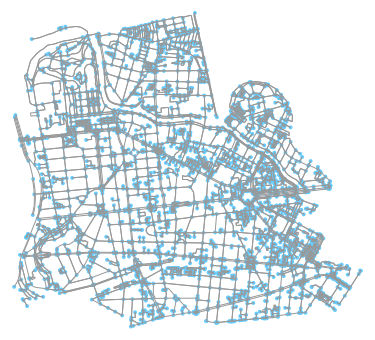

In [2]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

def plot_city(name_city_distr): 
    ''' given city district get information about schools there
    phone or email, 
    availability of data 
    format of name_city_distr "Kamppi, Helsinki, Finland"
    
    name_city_distr must be a shapely Polygon or MultiPolygon. If you requested graph from place name or address, make sure your query resolves to a Polygon or MultiPolygon, and not some other geometry, like a Point. See OSMnx documentation for details.
    '''
    
    place_name = name_city_distr # e.g. "Kamppi, Helsinki, Finland"
    
    # Fetch OSM street network from the location
    graph = ox.graph_from_place(place_name)
    type(graph)

    print('loading graph of city')

    # Plot the streets
    fig, ax = ox.plot_graph(graph)
    plt.show()

name_city = 'Charlottenburg,Berlin, Germany'
plot_city(name_city)    




### Research questions 

1. Does bike mobility data (bike sharing) have properties (different from other types of transport)? 
2. How different types of transport are influencing each other, e.g scooter data inlfuence bikes (temporal evolution of data - average in time)?
3. How weather, city network and distribution of bikes stations can influnece bike sharing functionality?

General question: how livable is the city with bikes data? 
Can we identify bottlenecks from the data of places, where people would like to go, but do not go for some reason.



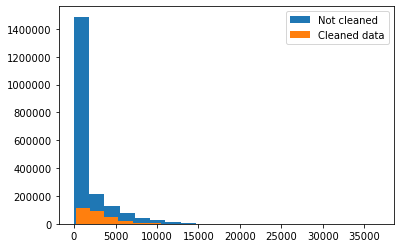

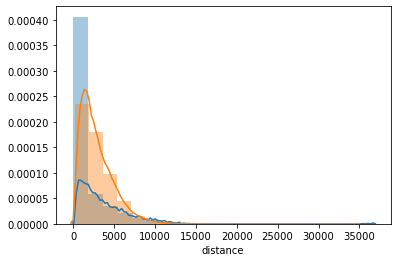

In [9]:
# Now we count the length of routes. 
# This can tell us if airlines fly more shorter routes, or more longer ones. 

import math
import matplotlib.pyplot as plt

import seaborn


# now we apply this function to routes dataframe
#route_lengths = routes.apply(calc_dist, axis=1)

# now we are plotting the histogram 
plt.hist(df.distance, bins=20)
plt.hist(df_cleaned.distance, bins=20)
plt.legend(['Not cleaned', 'Cleaned data']) #plt.legend(["Time window size"])
plt.show()

seaborn.distplot(df.distance, bins=20)
seaborn.distplot(df_cleaned.distance, bins=20)
plt.legend(['Not cleaned', 'Cleaned data'])
plt.show()

### Plotting on a map with bike data 

We use standard modules basemap for that. One can also use this module https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html 

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



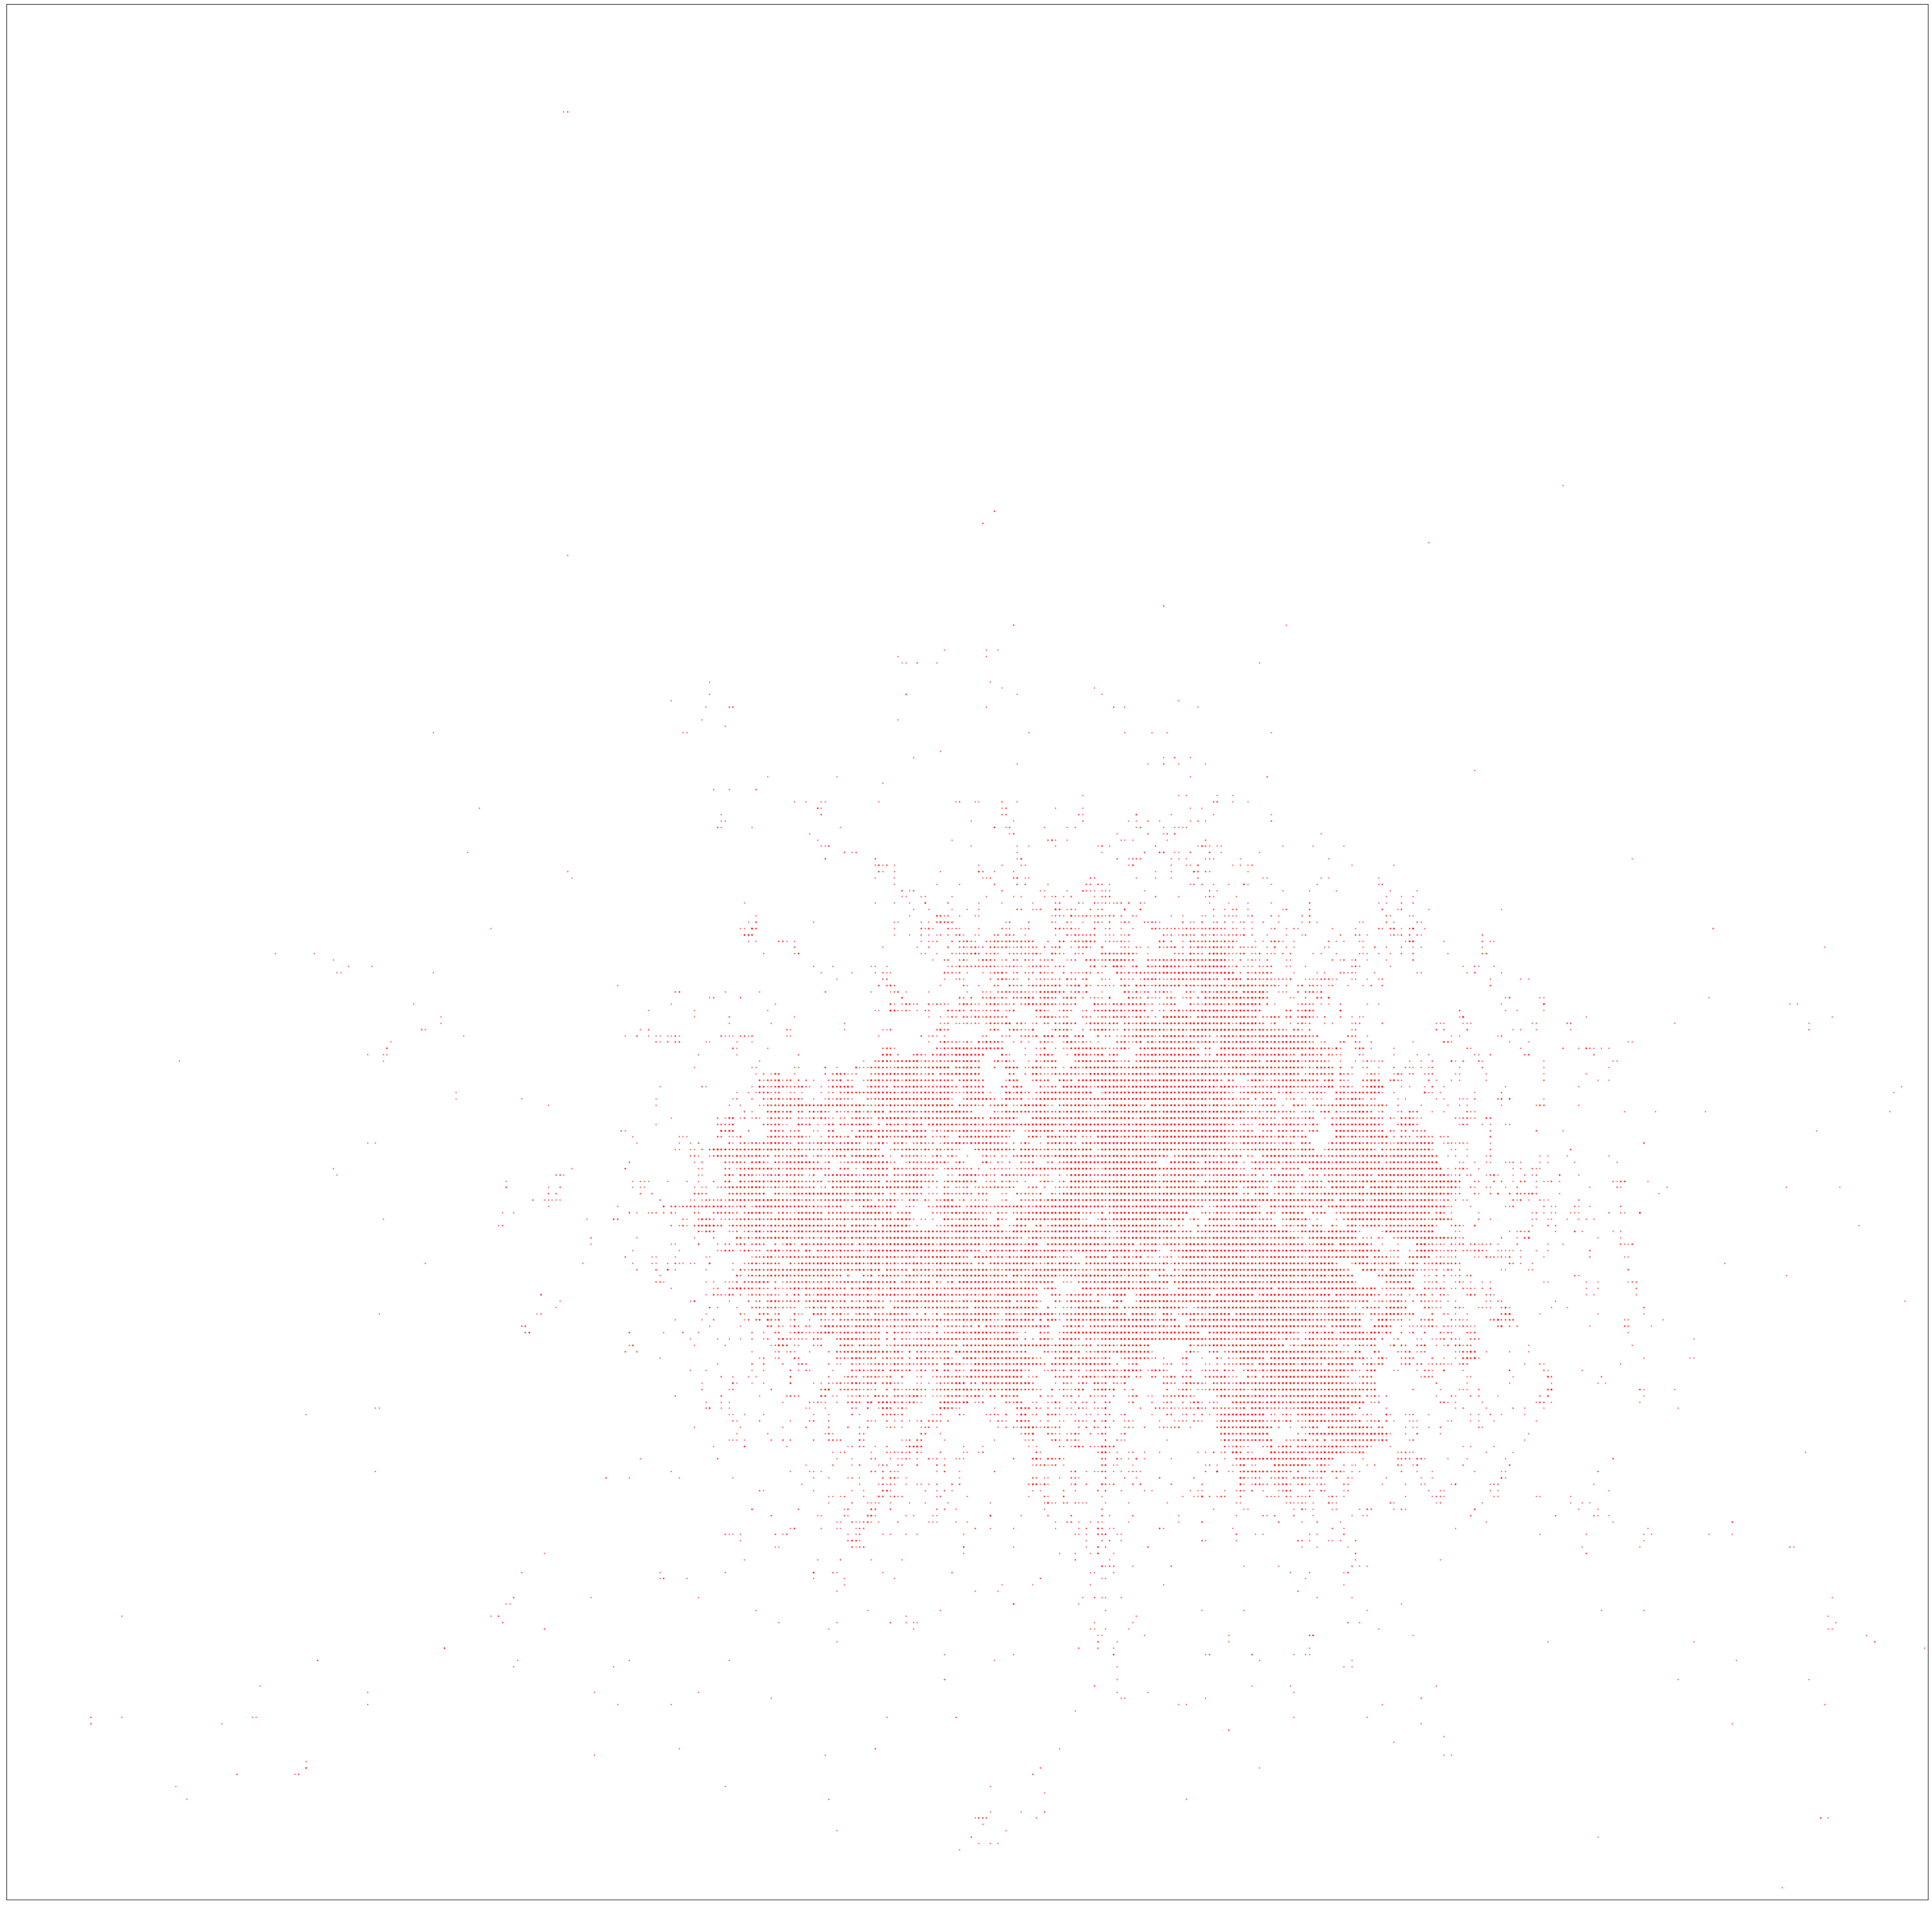

In [4]:
# Now let us plot data on a maps
# First we define x as ids of places
# Import the basemap package using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.

import math
import matplotlib.pyplot as plt

import seaborn
from mpl_toolkits.basemap import Basemap

# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
# Create a map on which to draw. 
# Use mercator projection, and showing the whole world.

fig, ax = plt.subplots(figsize=(60, 60))

# Berlin Latitude: 52.520008, longitude: 13.404954.
# We want to plot only Berlin surrounding areas
m = Basemap(projection='merc',llcrnrlat=52.4,urcrnrlat=52.7,llcrnrlon=13.1,urcrnrlon=13.6,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map. NASA bluemarble
m.shadedrelief() #m.bluemarble()


m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(df_cleaned["longitude"].astype(float)), list(df_cleaned["latitude"].astype(float)))

#print(type(x))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()



## Correlation of bikes activities with weather and other metadata

Examples of metadata: 
1. By metadata we mean distribution of places, e.g. libraries nearby, or kindergarten (ideas from hackatons).

2. We can also analyse the influence of trajectories by weather inspired by some similar analysis made for twitter from www.openhumans.org notebooks (Bastian et al.).



In [10]:
# get number of bikes taken at certain amount of time





### Weather data API

We can now go ahead and import the weather data from 

1. The Dark Sky's API and convert the data into a data frame: weather_variables  =['precipType','precipIntensity','temperatureHigh',                     'temperatureLow','precipIntensityMax','precipAccumulation',                       'apparentTemperatureHigh', 'apparentTemperatureLow']
             
2. Another possibility is directly load it from the API of openweathermap: 
https://openweathermap.org/history
By geographic coordinates
Description:
Call historical data by geographic coordinates.
API call:

http://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}

http://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&cnt={cnt}

Parameters:

lat, lon coordinates of the location of your interest

type type of the call, keep this parameter in the API call as 'hour'

start start date (unix time, UTC time zone), e.g. start=1369728000

end end date (unix time, UTC time zone), e.g. end=1369789200

cnt amount of returned data (one per hour, can be used instead of 'end')
Examples of API calls:
http://history.openweathermap.org/data/2.5/history/city?lat=41.85&lon=-87.65 

To access the API we need to sign up for an API key: https://openweathermap.org/appid, e.g.  529db9a71b67dcd25ca0ebc8c285687f


### Analysis of weather and bikes data 

Simplest analysis is now to correlate (linearly or using event synchronisation methods) data from weather_for_location_day(location, date) and data from bikes sharing files.



We investigate how location of starting position is influenced by the weather. For this we estimate weather in a starting location and then color point according to scale [1,2,3,4,5], where 1 corresponds to "bad" weather (cold, rainy), 5 corresponds to "good" weather (shiny, normal temperature). 
We use standard API calls from openweather website using https://www.dataquest.io/blog/python-api-tutorial/ 
Work in Progress.

  

In [8]:
import os
import json
import requests
from datetime import datetime
from collections import defaultdict
import pandas as pd
import numpy as np


OPENWEATHERKey = '529db9a71b67dcd25ca0ebc8c285687f'
DATARANGE_START = "2016-06-01"
DATARANGE_END = "2018-05-08"

# loop through all entrances of df_cleaned 
# we calculate weather in locations lat/long at starttime (we can also do it later for endtime)

#we could use darksky key DARKSKY_KEY = "e885d3f5c078117536660bd78c9a2c69"


def call_weather(loc_lat, loc_lon, start_date, end_date):
    '''we call openweathermap API to retrieve weather data file from website
    
    Parameters:

    lat, lon coordinates of the location of your interest

    type type of the call, keep this parameter in the API call as 'hour'

    start start date (unix time, UTC time zone), e.g. start=1369728000

    end end date (unix time, UTC time zone), e.g. end=1369789200

    cnt amount of returned data (one per hour, can be used instead of 'end')
    '''
        
    # Make a get request to get the latest position of the international space station from the opennotify api.

    APIcall = "http://history.openweathermap.org/data/2.5/history/city?lat={"+str(loc_lat)+"}&lon={"+str(loc_lon)+"}&type=hour&start={"+str(start_date)+"}&end={"+str(end_date)+"}"
    APIcallkey = "http://api.openweathermap.org/data/2.5/forecast?id=524901&"+str(OPENWEATHERKey)+"=1111111111"
    
    weather_resp = requests.get(APIcallkey)#("http://history.openweathermap.org/data/2.5/history/city?lat="+str(loc_lat)+"&lon="+str(loc_lon))#("http://history.openweathermap.org/data/2.5/history/city?id=2885679&type=hour")#("http://api.open-notify.org/iss-now.json") #("http://api.open-notify.org/iss-now.json")#
    # Print the status code of the response if everything is ok code = 200
    print(weather_resp.status_code)

    return weather_resp

loc_lat = row["latitude"]
loc_lon = row["longitude"]
start_date =1369728000
end_date = 1369783200

#testdate = "2016-06-01"
call_weather(loc_lat, loc_lon, start_date, end_date)



for index, row in df_cleaned.iterrows(): 
    #print (row["latitude"], row["latitude"]) 
    #print(row["starttime"]) 
    
    loc_lat = row["latitude"]
    loc_lon = row["longitude"]
    start_date =1369728000
    end_date = 1369783200

    #testdate = "2016-06-01"
    call_weather(loc_lat, loc_lon, start_date, end_date)
    #weather_for_location_day(testloc, testdate)

    
    

401


<Response [401]>

### Maps and routes for bikes 

We can also retrieve information about routes between different places using openstreetmap osmnx library.


In [4]:
import osmnx as ox #openstreetmap
import networkx as nx


#get shortest path beween nodes 
G.node[38862848]
#latitude of a node
G.node[38862848]['lat']

gdf_nodes, gdf_edges = ox.graph_to_gdfs()
path = nx.shortest_path(G, G.nodes()[0], G.nodes()[1])
gdf_nodes.loc[path]

## Correlation between mobility and amenities information on a map

We use openstreetmap API to get the information about places around certain location 
https://help.openstreetmap.org/questions/11004/download-a-map-and-extract-position-from-places-like-schools-hospitals-etc

We also using some plotting functions from here
https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html

loading graph of Berlin


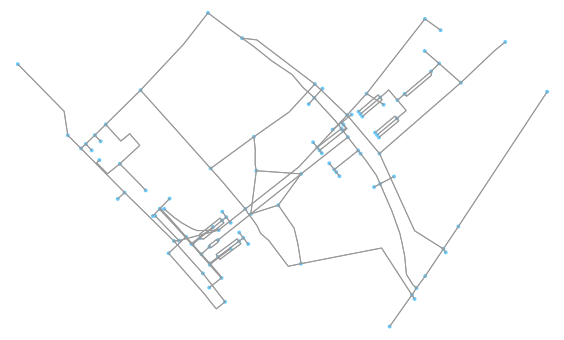

loading places


Index([], dtype='object')

In [2]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# https://www.digitalocean.com/community/tutorials/how-to-use-web-apis-in-python-3
# https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html


# Specify the name that is used to seach for the data
place_name = "Alexanderplatz, Berlin, Germany"# Kremlin, Arbat "Kamppi, Helsinki, Finland"


# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

print('loading graph of Berlin')

# Plot the streets
fig, ax = ox.plot_graph(graph)


# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)
print('loading places')

# Retrieve buildings from the area
#buildings = ox.footprints(place_name) #buildings_from_place(place_name)

# What types are those? if there is any information about buildings_from_place
#print(type(area))
#print(type(buildings))

# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

# How many restaurants do we have in this district?
len(restaurants)

schools = ox.pois_from_place(place_name, amenities=['school'])


# How many schools do we have in this district?
len(schools)

# Available columns and names of amenity we are searching for
schools.columns

In [5]:

#    Let’s extract the nodes and edges from the graph as GeoDataFrames:


# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))



Nodes:
            highway       osmid          x          y  \
4934187009     NaN  4934187009  13.414034  52.521729   
2777153538     NaN  2777153538  13.413788  52.521631   
2777026051     NaN  2777026051  13.412577  52.521067   
616476681      NaN   616476681  13.414628  52.521944   
2777026065     NaN  2777026065  13.412658  52.521099   

                                 geometry  
4934187009  POINT (13.4140343 52.5217286)  
2777153538  POINT (13.4137882 52.5216307)  
2777026051   POINT (13.4125771 52.521067)  
616476681   POINT (13.4146278 52.5219437)  
2777026065   POINT (13.412658 52.5210991)   

Edges:
                                             geometry  highway  key  length  \
0  LINESTRING (13.4140343 52.5217286, 13.4140201 ...  footway    0   1.573   
1  LINESTRING (13.4140343 52.5217286, 13.4140824 ...  footway    0   5.333   
2  LINESTRING (13.4140343 52.5217286, 13.4140636 ...  footway    0   5.325   
3  LINESTRING (13.4137882 52.5216307, 13.4138102 ...  footway    0   

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\geopandas\plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


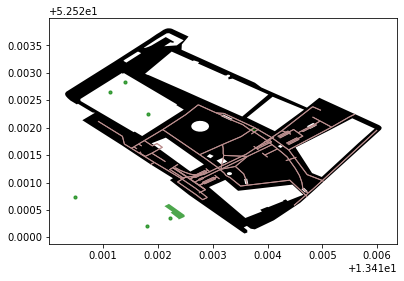

In [8]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
#buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)

# Plot schools
schools.plot(ax=ax, color='red', alpha=0.7, markersize=10)

plt.tight_layout()

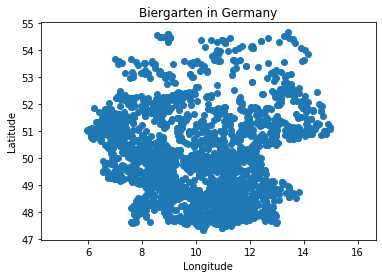

In [12]:
import numpy as np
import matplotlib.pyplot as plt# Collect coords into list
coords = []


import requests
import json

#import data about Germany

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()


# plot data of amenities

for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


# the same we can do for schools:) 

### Next steps

TODO: 
1. plot classified map of Berlin e.g. using https://automating-gis-processes.github.io/CSC/notebooks/L3/reclassify.html 
2. compare it with Hamming distance with number of stations of bikes 
3. analyze trajectories of bikes (in another file)


,id,id.1,bikeId,providerId,timestamp,latitude,longitude,prev_id,next_id,prev_lat,...,next_lon,end_timestamp,mode,response,geometry,distance,calc_time,waypoints,duration,speed
0,1,1,13001,0,2019-04-05 08:20:04.689917,52.510327,13.405788,13001.0,13001.0,52.536506,...,13.405788,2019-04-05 13:44:04.154419,accessible,NaN,NaN,NaN,NaN,NaN,0 days 05:23:59.464502000,NaN
1,2,2,13001,0,2019-04-05 13:44:04.154419,52.510327,13.405788,13001.0,13001.0,52.510327,...,13.421259,2019-04-05 18:16:03.582939,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.405853, 52.510328], [13.4...",3238.3,939.0,"[{'name': 'Neue Grünstraße', 'hint': 'OmIBgK6Q...",0 days 04:31:59.428520000,0.714356
2,3,3,13001,0,2019-04-05 18:16:03.582939,52.532190,13.421259,13001.0,13001.0,52.510327,...,13.421259,2019-04-05 18:20:04.351730,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:04:00.768791000,NaN
3,4,4,13001,0,2019-04-05 18:20:04.351730,52.532190,13.421259,13001.0,13001.0,52.532190,...,13.421317,2019-04-05 18:24:03.220242,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:03:58.868512000,NaN
4,5,5,13001,0,2019-04-05 18:24:03.220242,52.532183,13.421317,13001.0,13001.0,52.532190,...,13.421317,2019-04-06 12:48:04.815239,accessible,NaN,NaN,NaN,NaN,NaN,0 days 18:24:01.594997000,NaN
5,6,6,13001,0,2019-04-06 12:48:04.815239,52.532183,13.421317,13001.0,13001.0,52.532183,...,13.418194,2019-04-06 13:52:04.318176,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.421322, 52.532191], [13.4...",516.4,180.8,"[{'name': 'Raabestraße', 'hint': '7kIAgPNCAICh...",0 days 01:03:59.502937000,0.484188
6,7,7,13001,0,2019-04-06 13:52:04.318176,52.529784,13.418194,13001.0,13001.0,52.532183,...,13.418194,2019-04-07 11:16:05.033710,accessible,NaN,NaN,NaN,NaN,NaN,0 days 21:24:00.715534000,NaN
7,8,8,13001,0,2019-04-07 11:16:05.033710,52.529784,13.418194,13001.0,13001.0,52.529784,...,13.398198,2019-04-07 11:40:05.615470,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.418193, 52.529784], [13.4...",2388.2,643.3,"[{'name': 'Prenzlauer Allee', 'hint': 'mxYFgHo...",0 days 00:24:00.581760000,5.968089
8,9,9,13001,0,2019-04-07 11:40:05.615470,52.515599,13.398198,13001.0,13001.0,52.529784,...,13.398198,2019-04-07 12:08:04.375297,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:27:58.759827000,NaN
9,10,10,13001,0,2019-04-07 12:08:04.375297,52.515599,13.398198,13001.0,13001.0,52.515599,...,13.376464,2019-04-07 12:24:04.827844,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.398264, 52.515487], [13.3...",1783.2,514.4,"[{'name': 'Werderscher Markt', 'hint': 'QFkAgP...",0 days 00:16:00.452547000,6.683849


In [14]:
df.shape

(3626252, 22)

# Spatial distribution  regularity
The simplest forms of spatial data are gridded data, in which a scalar quantity is measured for each point in a regular grid of points. For taxi drop-offs and drop-in we assume some irregularities. We check it using G-distance.  For a given distance $d$, G-distance $G(d)$ is the proportion of nearest neighbor distances that are less than $d$. If the underlying process of the distribution is a CSR (Complete Spatial Randomness), $G$ function has an expectation of $G(d) = 1-exp(-\lambda \pi d^2)$.
For this we can use `libpysal` (if you need to work with shape files and geospatial files, we won't today) and `pointpats` libraries in python https://github.com/pysal/pointpats/blob/master/notebooks/pointpattern.ipynb 

**Point patterns** - series of point locations, $(s_1, s_2, \ldots, s_n)$ in a study region $\Re$. We limit our focus here to a two-dimensional space so that $s_j = (x_j, y_j)$ is the spatial coordinate pair for point location $j$. See more here https://en.wikipedia.org/wiki/Complete_spatial_randomness


In [2]:
import libpysal as ps

from datetime import datetime
from geopy.distance import geodesic
from pointpats import PointPattern, PoissonPointProcess, as_window, G, Genv
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


#read the file first
df = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/pseudonomysed_raw.csv')
df.head()



,id,id.1,id.1.1,latitude,longitude,next_lat,next_lon,distance,duration,speed,starttime,endtime
0,0,0,0,52.537,13.423,52.510,13.406,3657.5,1 days 23:12:00.595065000,0.077489,2019-04-03 09:00:00,2019-04-05 08:15:00
1,2,2,2,52.510,13.406,52.532,13.421,3238.3,0 days 04:31:59.428520000,0.714356,2019-04-05 13:30:00,2019-04-05 18:15:00
2,6,6,6,52.532,13.421,52.530,13.418,516.4,0 days 01:03:59.502937000,0.484188,2019-04-06 12:45:00,2019-04-06 13:45:00
3,8,8,8,52.530,13.418,52.516,13.398,2388.2,0 days 00:24:00.581760000,5.968089,2019-04-07 11:15:00,2019-04-07 11:30:00
4,10,10,10,52.516,13.398,52.516,13.376,1783.2,0 days 00:16:00.452547000,6.683849,2019-04-07 12:00:00,2019-04-07 12:15:00


In [3]:
df.columns

Index(['id', 'id.1', 'id.1.1', 'latitude', 'longitude', 'next_lat', 'next_lon',
       'distance', 'duration', 'speed', 'starttime', 'endtime'],
      dtype='object')

In [4]:

X,Y = df.next_lon, df.next_lat

X = X[::100]
Y = Y[::100]

points = zip(X,Y)

pp = PointPattern(points)

pp.summary()




Point Pattern
19954 points
Bounding rectangle [(12.308,51.325), (13.599,52.577)]
Area of window: 1.6163319999999928
Intensity estimate for window: 12345.236003494387
        x       y
0  13.406  52.510
1  13.352  52.531
2  13.431  52.503
3  13.424  52.491
4  13.433  52.530


Apply nearest neighbor analysis for the dataset of end-point locations.

# Next steps
1. We need to apply it to locations of separate providers
2. We need to remove some outliers from dataset

In [5]:
# some complicated functions, you are welcome to read
# maximum number of nearest neighbors 
pp.max_nnd


0.052000000000002884

In [6]:
pp.min_nnd

0.0

Text(0, 0.5, 'Latitude')

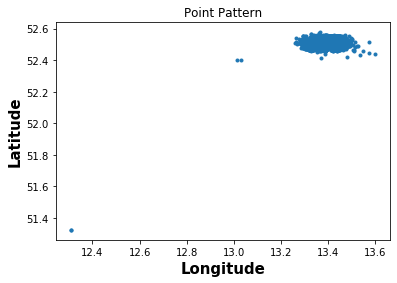

In [7]:
pp.plot()
# plt.tight_layout()
plt.xlabel('Longitude', fontsize=15,fontweight='bold')
plt.ylabel('Latitude', fontsize=15,fontweight='bold')
#plt.savefig('dropoff_pointPattern.pdf')